In [5]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def lotka_volterra(N, alpha):
    interaction_term = np.dot(alpha, N)  
    dNdt = N * (1 - N) - N * interaction_term
    return dNdt

def rk4_step(f, N, t, dt, h):
    k1 = f(N, h)
    k2 = f(N + 0.5 * dt * k1, h)
    k3 = f(N + 0.5 * dt * k2, h)
    k4 = f(N + dt * k3, h)
    return N + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

def solve_lotka_volterra(alpha, N0, t_max, dt):
    t_values = np.arange(0, t_max, dt)
    N_values = np.zeros((len(t_values), len(N0)))
    N_values[0] = N0
    for i in range(1, len(t_values)):
        N_values[i] = rk4_step(lotka_volterra, N_values[i-1], t_values[i-1], dt, alpha)
    return t_values, N_values


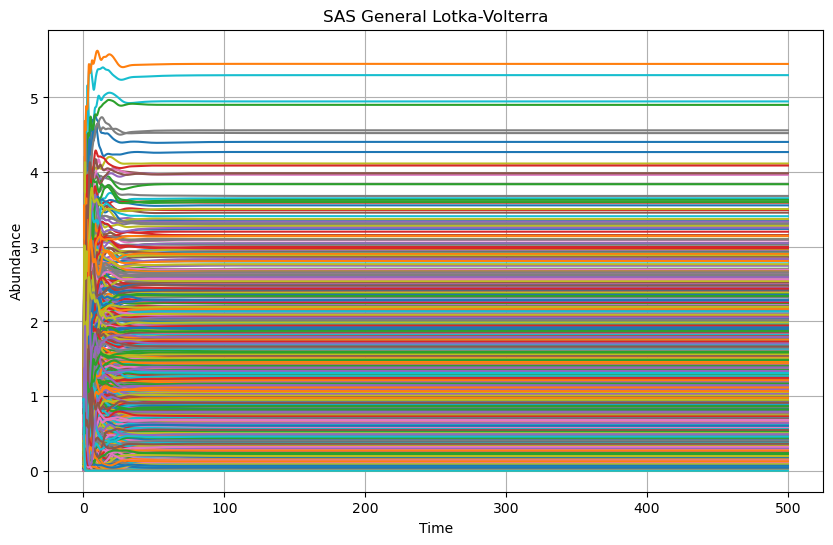

In [7]:
S2 = 1000
c2 = 999
sigma2 = 3
mu2 = 4


def generate_ER_antagonistic_matrix(S2):
    G2 = nx.erdos_renyi_graph(S2, c2/S2)
    adj_matrixG2 = nx.to_numpy_array(G2)
    weights = np.random.normal(mu2/c2 , sigma2/(np.sqrt(c2)),size=(S2,S2))
    np.fill_diagonal(weights, 0)
    Antagonistic_Matrix = adj_matrixG2*weights
    for i in range(S2):
        for j in range(i + 1, S2):  
            if Antagonistic_Matrix[i, j]*Antagonistic_Matrix[j, i] > 0:
                if np.random.rand() > 0.5:
                    Antagonistic_Matrix[i, j] = -Antagonistic_Matrix[i, j]
                else:
                    Antagonistic_Matrix[j, i] = -Antagonistic_Matrix[j, i]
    return Antagonistic_Matrix

A2 = generate_ER_antagonistic_matrix(S2)
N02 = np.random.uniform(0, 1, size=S2)


t_max2 = 500
dt2 = 0.05


t_values2, N_values2 = solve_lotka_volterra(A2, N02, t_max2, dt2)

plt.figure(figsize=(10, 6))
for i in range(S2):
    plt.plot(t_values2, N_values2[:, i])
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title('SAS General Lotka-Volterra')
plt.grid(True)
plt.show()